# Quantinum DATA ANALYTICS TASK 2

For this part of the project we will be examining the performance in trial vs control stores to provide a recommendation for each location based on our insight. Below are some of the areas I want you to focus on, of course if you discover any other interesting insights feel free to include them in your findings.

Select control stores – explore the data and define metrics for your control store selection – think about what would make them a control store. Look at the drivers and make sure you visualise these in a graph to better determine if they are suited. For this piece it may even be worth creating a function to help you. 

Assessment of the trial – this one should give you some interesting insights into each of the stores, check each trial store individually in comparison with the control store to get a clear view of its overall performance. We want to know if the trial stores were successful or not. 

Collate findings – summarise your findings for each store and provide an recommendation that we can share with Julia outlining the impact on sales during the trial period.

**Julia** has asked us to evaluate the performance of a store trial which was performed in stores 77, 86 and 88.

We have chosen to complete this task in R, however, you will also find Python to be a useful tool in this piece of analytics. We have also provided an R solution template if you want some assistance in getting through this Task.

To get started, use the QVI_data dataset below or your output from task 1 and consider the monthly sales experience of each store. 

**This can be broken down by:**

- total sales revenue
- total number of customers
- average number of transactions per customer

Create a measure to compare different control stores to each of the trial stores to do this write a function to reduce having to re-do the analysis for each trial store. Consider using Pearson correlations or a metric such as a magnitude distance e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
QVI_data = pd.read_csv("C:/Users/Mishael/Downloads/Quantium Data Project/QVI_data.csv")
QVI_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [5]:
QVI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


**From the info() it appears that there are no missing value (Null value). But the DATE column is with the wrong datatype**

In [6]:
#Convert the DATE column to datetime and create new columnS for the YEAR and MONTH
QVI_data["DATE"] = pd.to_datetime(QVI_data["DATE"])
QVI_data["YEAR"] = QVI_data["DATE"].dt.strftime("%Y").astype("int")
QVI_data["MONTH"] = QVI_data["DATE"].dt.strftime("%m").astype("int")

# Extract the year and month and combine into yyyymm format
QVI_data["YEAR_MONTH"] = QVI_data["DATE"].dt.strftime('%Y%m').astype("int")
QVI_data["DATE"].head()

0   2018-10-17
1   2018-09-16
2   2019-03-07
3   2019-03-08
4   2018-11-02
Name: DATE, dtype: datetime64[ns]

In [7]:
QVI_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR,MONTH,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,10,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,9,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,3,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,3,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,11,201811


In [8]:
# Get the current month name
QVI_data["MONTH_NAME"] = QVI_data["DATE"].dt.strftime('%B').astype("object").str[:3]

In [9]:
QVI_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR,MONTH,YEAR_MONTH,MONTH_NAME
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018,10,201810,Oct
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018,9,201809,Sep
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019,3,201903,Mar
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019,3,201903,Mar
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018,11,201811,Nov


## **For each store and month calculate**

---
- Total sales.
- Number of customers.
- Transactions per customer.
- Chips per customer.
- Average price per unit.

In [10]:
# Calculate total sales, number of unique customers, and number of transactions per store
def calculate_store_metrics(QVI_data):
    store_metrics = QVI_data.groupby('STORE_NBR').agg(
        total_sales=('TOT_SALES', 'sum'),
        total_customers=('LYLTY_CARD_NBR', 'nunique'),
        total_transactions=('TXN_ID', 'nunique'),
        total_chips=('PROD_QTY', 'sum')
    ).reset_index()
    
    return store_metrics

# Get metrics for each store
store_metrics = calculate_store_metrics(QVI_data)
store_metrics.head()


,STORE_NBR,total_sales,total_customers,total_transactions,total_chips
0,1,2393.60,345,572,704
1,2,2005.80,313,505,564
2,3,12802.45,364,1489,2915
3,4,14647.65,379,1667,3316
4,5,9500.80,238,1358,2704


In [11]:
# Calculate total sales, number of unique customers, and number of transactions per store
def avg_store_metrics(QVI_data):
    # Grouping and aggregating data
    store_metrics = QVI_data.groupby(['STORE_NBR', 'YEAR', 'MONTH', 'MONTH_NAME', 'YEAR_MONTH']).agg(
        total_sales=('TOT_SALES', 'sum'),
        total_customers=('LYLTY_CARD_NBR', 'nunique'),
        total_transactions=('TXN_ID', 'nunique'),
        total_chips=('PROD_QTY', 'sum')
    ).reset_index()
    
    # Calculate average transactions per customer
    store_metrics['avg_txn_per_customer'] = store_metrics['total_transactions'] / store_metrics['total_customers'].replace(0, pd.NA)  # Avoid division by zero
    store_metrics['chips_per_customer'] = store_metrics['total_chips'] / store_metrics['total_customers'].replace(0, pd.NA)  # Handle zero customers
    store_metrics['average_price'] =store_metrics['total_sales']/ store_metrics['total_chips'].replace(0, pd.NA)
    
    return store_metrics[['STORE_NBR', 'YEAR', 'MONTH_NAME', 'YEAR_MONTH', 'total_sales', 'total_customers', 'avg_txn_per_customer', 'chips_per_customer', 'average_price']]

# Get metrics for each store
store_metrics_avg = avg_store_metrics(QVI_data)
store_metrics_avg.head()


,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price
0,1,2018,Jul,201807,206.9,49,1.061224,1.265306,3.337097
1,1,2018,Aug,201808,176.1,42,1.023810,1.285714,3.261111
2,1,2018,Sep,201809,278.8,59,1.050847,1.271186,3.717333
3,1,2018,Oct,201810,188.1,44,1.022727,1.318182,3.243103
4,1,2018,Nov,201811,192.6,46,1.021739,1.239130,3.378947


In [12]:
# Total Sales for each store and month.

Total_Sales= QVI_data.groupby(['STORE_NBR', 'YEAR', 'MONTH', 'MONTH_NAME']).TOT_SALES.sum()
Total_Sales.head()

STORE_NBR  YEAR  MONTH  MONTH_NAME
1          2018  7      Jul           206.9
                 8      Aug           176.1
                 9      Sep           278.8
                 10     Oct           188.1
                 11     Nov           192.6
Name: TOT_SALES, dtype: float64

In [13]:
# Number of customers for each store and month.

no_Customers = QVI_data.groupby(['STORE_NBR', 'YEAR', 'MONTH', 'MONTH_NAME']).LYLTY_CARD_NBR.nunique()
no_Customers

STORE_NBR  YEAR  MONTH  MONTH_NAME
1          2018  7      Jul           49
                 8      Aug           42
                 9      Sep           59
                 10     Oct           44
                 11     Nov           46
                                      ..
272        2019  2      Feb           45
                 3      Mar           50
                 4      Apr           54
                 5      May           34
                 6      Jun           34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [14]:
# Transactions per customer for each store and month.

trans_per_customer = QVI_data.groupby(['STORE_NBR', 'YEAR', 'MONTH_NAME']).TXN_ID.nunique()/QVI_data.groupby(['STORE_NBR', 'YEAR', 'MONTH_NAME']).LYLTY_CARD_NBR.nunique()
trans_per_customer

STORE_NBR  YEAR  MONTH_NAME
1          2018  Aug           1.023810
                 Dec           1.119048
                 Jul           1.061224
                 Nov           1.021739
                 Oct           1.022727
                                 ...   
272        2019  Feb           1.066667
                 Jan           1.086957
                 Jun           1.088235
                 Mar           1.060000
                 May           1.176471
Length: 3169, dtype: float64

In [15]:
# Chips per customer for each store and month.

chips_per_customer = QVI_data.groupby(['STORE_NBR', 'MONTH_NAME']).PROD_QTY.sum()/ QVI_data.groupby(['STORE_NBR', 'MONTH_NAME']).TXN_ID.nunique()
chips_per_customer

STORE_NBR  MONTH_NAME
1          Apr           1.325581
           Aug           1.255814
           Dec           1.212766
           Feb           1.181818
           Jan           1.166667
                           ...   
272        Mar           1.905660
           May           1.775000
           Nov           1.933333
           Oct           1.980000
           Sep           1.972222
Length: 3169, dtype: float64

In [16]:
# Average price per unit for each store and month.

average_price = QVI_data.groupby(['STORE_NBR', 'MONTH_NAME']).TOT_SALES.sum()/ QVI_data.groupby(['STORE_NBR', 'MONTH_NAME']).PROD_QTY.sum()
average_price

STORE_NBR  MONTH_NAME
1          Apr           3.384211
           Aug           3.261111
           Dec           3.326316
           Feb           3.467692
           Jan           3.685714
                           ...   
272        Mar           4.379208
           May           4.430986
           Nov           4.324138
           Oct           4.349495
           Sep           4.291549
Length: 3169, dtype: float64

The instructions outline the steps needed to select appropriate control stores for the given trial stores (77, 86, and 88). Control stores must be similar to trial stores based on specified metrics prior to the trial period (February 2019).

1. Select Trial and Control Stores<br>
    Trial Stores: Stores 77, 86, and 88 are identified as trial stores.<br>
    Control Stores:
    Must be established stores operational throughout the entire observation period (e.g., stores with data from the start to the end of the pre-trial period).
    Should be similar to trial stores based on specific metrics.

The analysis focuses on the period before February 2019 (the pre-trial period).
Control stores are chosen based on similarity to trial stores during this time.

In [17]:
# Step 1: Filter for stores with full observation periods (12 months of data) from (Jan 2018 to Jan 2019)
stores_with_full_obs = (
                    store_metrics_avg.groupby('STORE_NBR')['YEAR_MONTH']
                    .nunique()  # Count unique months per store
                    .reset_index(name='num_months')  # Create a new column for the counts
                    .query('num_months == 12')  # Filter for stores with exactly 12 months of data
                    ['STORE_NBR']  # Extract the store numbers
                    .tolist()  # Convert to a list
)

In [18]:
# Step 2: Filter for the pre-trial period and stores with full observations
pre_trial_measures = store_metrics_avg[(store_metrics_avg['YEAR_MONTH'] < 201902) & 
                                     (store_metrics_avg['STORE_NBR'].isin(stores_with_full_obs))]

pre_trial_measures.head()

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price
0,1,2018,Jul,201807,206.9,49,1.061224,1.265306,3.337097
1,1,2018,Aug,201808,176.1,42,1.023810,1.285714,3.261111
2,1,2018,Sep,201809,278.8,59,1.050847,1.271186,3.717333
3,1,2018,Oct,201810,188.1,44,1.022727,1.318182,3.243103
4,1,2018,Nov,201811,192.6,46,1.021739,1.239130,3.378947


Identify the most similar stores to a trial store based on a chosen metric (e.g., total sales)

In [189]:
def calculate_correlation_table(metrics, trial_store, input_table=pre_trial_measures):

    # Identify control stores (exclude trial stores)
    control_store_numbers = input_table[~input_table["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()

    # Initialize an empty DataFrame to store correlation results
    correlation_results = pd.DataFrame(columns=["YEAR_MONTH", "Trial_Store", "Control_Store", "Corr_Score"])

    # Extract trial store data for the specified metrics
    trial_store_data = input_table[input_table["STORE_NBR"] == trial_store][metrics].reset_index()

    # Loop through each control store to calculate correlations
    for control_store in control_store_numbers:
        # Extract control store data for the specified metrics
        control_store_data = input_table[input_table["STORE_NBR"] == control_store][metrics].reset_index()

        # Create a DataFrame to hold results for this control store
        control_correlation = pd.DataFrame(columns=["YEAR_MONTH", "Trial_Store", "Control_Store", "Corr_Score"])

        # Compute correlation between trial and control store metrics
        control_correlation["Corr_Score"] = trial_store_data.corrwith(control_store_data, axis=1)

        # Add metadata for trial and control store numbers and YEARMONTH
        control_correlation["Trial_Store"] = trial_store
        control_correlation["Control_Store"] = control_store
        control_correlation["YEAR_MONTH"] = input_table[input_table["STORE_NBR"] == trial_store]["YEAR_MONTH"].values

        # Append to the main results DataFrame
        correlation_results = pd.concat([correlation_results, control_correlation], ignore_index=True)

    return correlation_results


# Generate the correlation table for multiple trial stores
correlation_table = pd.DataFrame()
trial_store_numbers = [77, 86, 88]  # List of trial stores

# Loop through each trial store to calculate correlations
for trial_store in trial_store_numbers:
    correlation_table = pd.concat(
        [
            correlation_table,
            calculate_correlation_table(
                metrics=["total_sales", "total_customers", "avg_txn_per_customer", "chips_per_customer", "average_price"],
                trial_store=trial_store,
            ),
        ],
        ignore_index=True,
    )


correlation_table.head()


,YEAR_MONTH,Trial_Store,Control_Store,Corr_Score
0,201807,77,1,0.070414
1,201808,77,1,0.027276
2,201809,77,1,0.002389
3,201810,77,1,-0.020045
4,201811,77,1,0.030024


In [190]:
def calculate_magnitude_distance(metrics, trial_store, input_table=pre_trial_measures):

    # Identify control stores (exclude trial stores)
    control_store_numbers = input_table[~input_table["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()

    # Initialize an empty DataFrame to store magnitude distance results
    mag_distances = pd.DataFrame()

    # Extract trial store data for the specified metrics
    trial_store_data = input_table[input_table["STORE_NBR"] == trial_store][metrics]

    # Loop through each control store to calculate magnitude distances
    for control_store in control_store_numbers:
        # Calculate the absolute difference between trial and control store metrics
        control_store_data = input_table[input_table["STORE_NBR"] == control_store][metrics].reset_index()
        distance_data = abs(trial_store_data.reset_index()[metrics] - control_store_data[metrics])

        # Add metadata for trial and control store numbers and YEARMONTH
        distance_data["YEAR_MONTH"] = input_table[input_table["STORE_NBR"] == trial_store]["YEAR_MONTH"].values
        distance_data["Trial_Store"] = trial_store
        distance_data["Control_Store"] = control_store

        # Append to the main results DataFrame
        mag_distances = pd.concat([mag_distances, distance_data], ignore_index=True)

    # Normalize each metric column
    for metric in metrics:
        mag_distances[metric] = 1 - (
            (mag_distances[metric] - mag_distances[metric].min())
            / (mag_distances[metric].max() - mag_distances[metric].min())
        )

    # Calculate the average magnitude distance across all metrics
    mag_distances["Mag_Distance"] = mag_distances[metrics].mean(axis=1)

    return mag_distances


# Generate the magnitude distance table for multiple trial stores
magnitude_distance_table = pd.DataFrame()
trial_store_numbers = [77, 86, 88]  # List of trial stores

# Loop through each trial store to calculate magnitude distances
for trial_store in trial_store_numbers:
    magnitude_distance_table = pd.concat(
        [
            magnitude_distance_table,
            calculate_magnitude_distance(
                metrics=["total_sales", "total_customers", "avg_txn_per_customer", "chips_per_customer", "average_price"],
                trial_store=trial_store,
            ),
        ],
        ignore_index=True,
    )

magnitude_distance_table.head()


,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price,YEAR_MONTH,Trial_Store,Control_Store,Mag_Distance
0,0.935431,0.980769,0.956123,0.739412,0.883569,201807,77,1,0.899061
1,0.942972,0.951923,0.993541,0.802894,0.886328,201808,77,1,0.915532
2,0.961503,0.836538,0.991768,0.730041,0.703027,201809,77,1,0.844575
3,0.988221,0.932692,0.989036,0.940460,0.590528,201810,77,1,0.888188
4,0.962149,0.951923,0.868852,0.730358,0.832481,201811,77,1,0.869153


Define the weight for correlation in the combined score calculation
--
 `corr_weight` determines the relative importance of the correlation score 
 versus the magnitude distance score in the combined metric calculation. 
 - A higher value for `corr_weight` prioritizes correlation (similarity in trend).
 - A lower value for `corr_weight` prioritizes magnitude distance (similarity in value size).
 - For instance:
   - `corr_weight = 0.5` gives equal importance to both measures.
   - `corr_weight = 0.7` makes correlation more important than magnitude.
corr_weight = 0.5

Calculate a combined score for total sales and total customers
 --
 First, concatenate (`Sales` and  `customer`) correlation and magnitude distance results into a single
 DataFrame. This ensures both metrics (`Correlation` and `Magnitude_Distance`) are 
 available for each control store.
Moreso, we calculate a `Combined_Sales_Score` and `Combined_customer_Score` metric by combining the correlation 
 and magnitude distance scores for (`Sales` and `customer`) using the defined weight:
 - `corr_weight * Sales_Score['Correlation']` accounts for the trend similarity.
 - `(1 - corr_weight) * Sales_Score['Magnitude_Distance']` accounts for the 
   absolute size similarity.<br>
 The resulting `Combined_Sales_Score` represents how similar each control store is 
 to the trial store in terms of total sales, considering both trend and size.
 
The same applies to the `Combined_customer_Score`.


In [178]:
def combine_corr_dist(metrics, trial_store, input_table=pre_trial_measures):

    # Generate correlation data
    corr = calculate_correlation_table(metrics, trial_store, input_table)

    # Generate magnitude distance data
    mag = calculate_magnitude_distance(metrics, trial_store, input_table)

    # Drop metric columns from the magnitude distance table to avoid duplication
    mag = mag.drop(columns=metrics, axis=1)

    # Merge correlation and magnitude distance tables
    combined_data = pd.merge(corr, mag, on=["YEAR_MONTH", "Trial_Store", "Control_Store"])
    return combined_data


In [196]:
# Configuration: List of trial stores and metrics
trial_stores = [77, 86, 88]
selected_metrics = ["total_sales"]

# Combine correlation and magnitude distance for all trial stores
comparison_metrics_table1 = pd.DataFrame()

for trial_store in trial_stores:
    comparison_metrics_table1 = pd.concat([comparison_metrics_table, combine_corr_dist(selected_metrics, trial_store)],
        ignore_index=True)

# Configure weights for correlation and magnitude distance
corr_weight = 0.5
mag_weight = 1 - corr_weight

# Group data by trial and control stores, calculate mean scores
grouped_comparison_table1 = comparison_metrics_table1.groupby(["Trial_Store", "Control_Store"]).mean().reset_index()

# Compute comparison score using weighted correlation and magnitude distance
grouped_comparison_table1["Comp_Score"] = ((corr_weight * grouped_comparison_table1["Corr_Score"]) +
                                          (mag_weight * grouped_comparison_table1["Mag_Distance"]))

In [197]:
# Display top control stores for each trial store based on comparison score
for trial_store in comparison_metrics_table1["Trial_Store"].unique():
    top_control_stores = (
        grouped_comparison_table1[grouped_comparison_table1["Trial_Store"] == trial_store]
        .sort_values(by="Comp_Score", ascending=False)
        .head() 
    )
    print(f"\nTop Control Stores for Trial Store {trial_store}:" )
    print(top_control_stores)



Top Control Stores for Trial Store 77:
     Trial_Store  Control_Store  Corr_Score  Mag_Distance  Comp_Score
218           77            233         1.0      0.993132    0.996566
38            77             41         1.0      0.976648    0.988324
101           77            111         1.0      0.968407    0.984203
105           77            115         1.0      0.967033    0.983516
15            77             17         1.0      0.965659    0.982830

Top Control Stores for Trial Store 86:
     Trial_Store  Control_Store  Corr_Score  Mag_Distance  Comp_Score
401           86            155         1.0      0.986772    0.993386
467           86            225         1.0      0.969577    0.984788
356           86            109         1.0      0.969577    0.984788
471           86            229         1.0      0.964286    0.982143
293           86             39         1.0      0.961640    0.980820

Top Control Stores for Trial Store 88:
     Trial_Store  Control_Store  Corr_Sc

Determining the top five highest composite score for each trial based on no. of customers

In [198]:
# Configuration: List of trial stores and metrics
trial_stores = [77, 86, 88]
selected_metrics = ["total_customers"]

# Combine correlation and magnitude distance for all trial stores
comparison_metrics_table2 = pd.DataFrame()

for trial_store in trial_stores:
    comparison_metrics_table2 = pd.concat([comparison_metrics_table2, combine_corr_dist(selected_metrics, trial_store)],
        ignore_index=True)

# Configure weights for correlation and magnitude distance
corr_weight = 0.5
mag_weight = 1 - corr_weight

# Group data by trial and control stores, calculate mean scores
grouped_comparison_table2 = comparison_metrics_table2.groupby(["Trial_Store", "Control_Store"]).mean().reset_index()

# Compute comparison score using weighted correlation and magnitude distance
grouped_comparison_table2["Comp_Score"] = ((corr_weight * grouped_comparison_table2["Corr_Score"]) +
                                          (mag_weight * grouped_comparison_table2["Mag_Distance"]))

In [199]:
# Display top control stores for each trial store based on comparison score
for trial_store in comparison_metrics_table2["Trial_Store"].unique():
    top_control_stores = (
        grouped_comparison_table2[grouped_comparison_table2["Trial_Store"] == trial_store]
        .sort_values(by="Comp_Score", ascending=False)
        .head() 
    )
    print(f"\nTop Control Stores for Trial Store {trial_store}:" )
    print(top_control_stores)


Top Control Stores for Trial Store 77:
     Trial_Store  Control_Store  Corr_Score  Mag_Distance  Comp_Score
218           77            233         1.0      0.993132    0.996566
38            77             41         1.0      0.976648    0.988324
101           77            111         1.0      0.968407    0.984203
105           77            115         1.0      0.967033    0.983516
15            77             17         1.0      0.965659    0.982830

Top Control Stores for Trial Store 86:
     Trial_Store  Control_Store  Corr_Score  Mag_Distance  Comp_Score
401           86            155         1.0      0.986772    0.993386
467           86            225         1.0      0.969577    0.984788
356           86            109         1.0      0.969577    0.984788
471           86            229         1.0      0.964286    0.982143
293           86             39         1.0      0.961640    0.980820

Top Control Stores for Trial Store 88:
     Trial_Store  Control_Store  Corr_Sc

In [200]:
# Compare and rank control stores for each trial store
for trial_store in comparison_metrics_table2["Trial_Store"].unique():
    # Filter and sort comparison scores for trial store in table 1
    table1_scores = (
        grouped_comparison_table1[grouped_comparison_table1["Trial_Store"] == trial_store]
        .sort_values(by="Comp_Score", ascending=False)
        .set_index(["Trial_Store", "Control_Store"])["Comp_Score"]
    )

    # Filter and sort comparison scores for trial store in table 2
    table2_scores = (
        grouped_comparison_table2[grouped_comparison_table2["Trial_Store"] == trial_store]
        .sort_values(by="Comp_Score", ascending=False)
        .set_index(["Trial_Store", "Control_Store"])["Comp_Score"]
    )

    # Combine scores from both tables, compute the average, and rank top control stores
    averaged_scores = (
        pd.concat([table1_scores, table2_scores], axis=1).mean(axis=1)
    ).sort_values(ascending=False)

    # Print the top 3 ranked control stores
    print(f"\nTop 3 Control Stores for Trial Store {trial_store}:")
    print(averaged_scores.head(3))



Top 3 Control Stores for Trial Store 77:
Trial_Store  Control_Store
77           233              0.996566
             41               0.988324
             111              0.984203
dtype: float64

Top 3 Control Stores for Trial Store 86:
Trial_Store  Control_Store
86           155              0.993386
             109              0.984788
             225              0.984788
dtype: float64

Top 3 Control Stores for Trial Store 88:
Trial_Store  Control_Store
88           40               0.971051
             26               0.962300
             72               0.955168
dtype: float64


Control stores similar to the Trial stores based on total sales:
--
1. Trial store 77: Store 233, 255, 188
2. Trial store 86: Store 109, 155, 222
3. Trial store 88: Store 40, 26, 72

Control stores similar to the Trial stores based on No. of Customers:
--
1. Trial store 77: Store 233, 41, 111
2. Trial store 86: Store 155, 225, 109
3. Trial store 88: Store 237, 203, 40

Control stores similar to the Trial stores based on Highest average of both features combined:
--
1. Trial store 77: Store 233
2. Trial store 86: Store 155
3. Trial store 88: Store 40

Now that we have found a control store, let's check visually if the drivers are indeed similar in the period before the trial.

Set Up the Data for Total Sales and Total Customers
---

In [201]:
pre_trial_measures[pre_trial_measures['STORE_NBR'] == 233]

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price
2699,233,2018,Jul,201807,290.7,51,1.058824,1.725490,3.303409
2700,233,2018,Aug,201808,285.9,48,1.041667,1.666667,3.573750
2701,233,2018,Sep,201809,228.6,42,1.071429,1.666667,3.265714
2702,233,2018,Oct,201810,185.7,35,1.028571,1.600000,3.316071
2703,233,2018,Nov,201811,211.6,40,1.025000,1.550000,3.412903
2704,233,2018,Dec,201812,279.8,47,1.063830,1.595745,3.730667
2705,233,2019,Jan,201901,177.5,35,1.000000,1.342857,3.776596


In [202]:
trial_store = 77
control_store = 233

# create a copy of the DataFrame pre_trial_measures
measure_over_time_sales = pre_trial_measures.copy()

# First, we need to categorize the stores as "Trial", "Control", or "Other stores"
measure_over_time_sales['Store_type'] = measure_over_time_sales['STORE_NBR'].apply(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)


In [218]:
measure_over_time_sales.head()

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price,Store_type
0,1,2018,Jul,201807,206.9,49,1.061224,1.265306,3.337097,Other stores
1,1,2018,Aug,201808,176.1,42,1.023810,1.285714,3.261111,Other stores
2,1,2018,Sep,201809,278.8,59,1.050847,1.271186,3.717333,Other stores
3,1,2018,Oct,201810,188.1,44,1.022727,1.318182,3.243103,Other stores
4,1,2018,Nov,201811,192.6,46,1.021739,1.239130,3.378947,Other stores


In [264]:
# Lastly, Filter for pre-trial period (e.g., before March 2019)
pre_trial_period = measure_over_time_sales[measure_over_time_sales['YEAR_MONTH'] < 201903]

#Then Calculate average total sales by YEAR_MONTH and Store_type
past_sales = pre_trial_period.groupby(['YEAR_MONTH', 'MONTH_NAME', 'Store_type', 'STORE_NBR']).agg(
    totSales=('total_sales', 'mean'), totCust=('total_customers', 'mean')
).reset_index()

# Also, we need to create a TransactionMonth column for proper plotting
past_sales['TransactionMonth'] = pd.to_datetime( past_sales['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d')

past_sales.head()

,YEAR_MONTH,MONTH_NAME,Store_type,STORE_NBR,totSales,totCust,TransactionMonth
0,201807,Jul,Control,233,290.7,51.0,2018-07-01
1,201807,Jul,Other stores,1,206.9,49.0,2018-07-01
2,201807,Jul,Other stores,2,150.8,39.0,2018-07-01
3,201807,Jul,Other stores,3,1205.7,112.0,2018-07-01
4,201807,Jul,Other stores,4,1399.9,128.0,2018-07-01


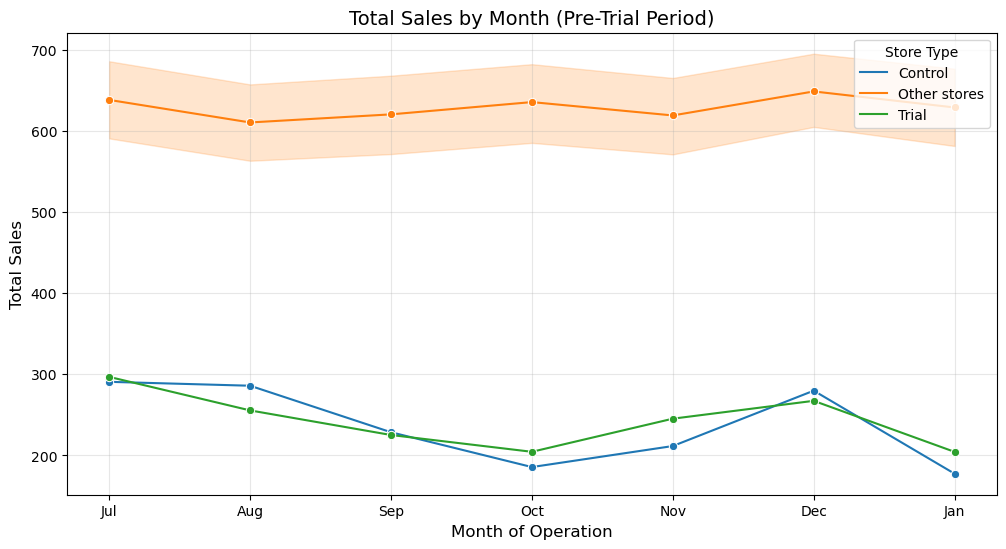

In [265]:
# Plot the trends using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_sales, x='MONTH_NAME', y='totSales', hue='Store_type', marker='o')

# Customize the plot
plt.title('Total Sales by Month (Pre-Trial Period)', fontsize=14)
plt.xlabel('Month of Operation', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.legend(title='Store Type',loc='upper right')
plt.grid(alpha=0.3)
plt.show()

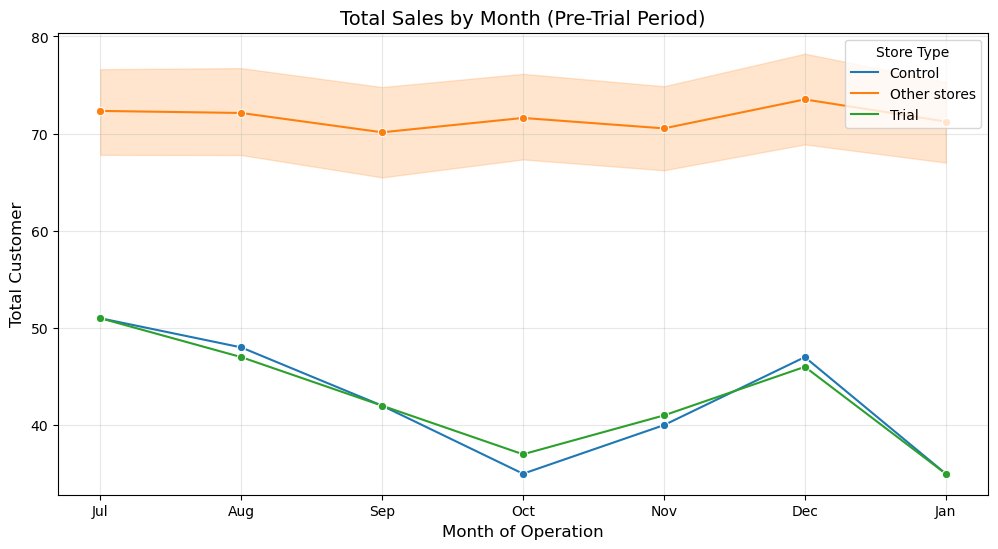

In [267]:
# Plot the trends using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=past_sales, x='MONTH_NAME', y='totCust', hue='Store_type', marker='o')

# Customize the plot
plt.title('Total Sales by Month (Pre-Trial Period)', fontsize=14)
plt.xlabel('Month of Operation', fontsize=12)
plt.ylabel('Total Customer', fontsize=12)
plt.legend(title='Store Type',loc='upper right')
plt.grid(alpha=0.3)
plt.show()

In [531]:
trial_stores = [77, 86, 88]
control_stores = [233, 155, 40]

measure_over_time =  store_metrics_avg.copy()
    
# Filter pre-trial data (before February 2019) for trial and control stores
pre_trial_sales = measure_over_time[(measure_over_time['YEAR_MONTH'] < 201902)]

# Initialize an empty dictionary to store scaling factors
scaling_factors = {}

# Calculate scaling factors for each pair of trial and control stores
for trial_store, control_store in zip(trial_stores, control_stores):
    trial_sales = pre_trial_sales[(pre_trial_sales["STORE_NBR"] == trial_store)]["total_sales"].sum()
    
    control_sales = pre_trial_sales[(pre_trial_sales["STORE_NBR"] == control_store)]["total_sales"].sum()
    
    scaling_factors[(trial_store, control_store)] = trial_sales / control_sales

In [532]:
scaling_factors

{(77, 233): 1.023617303289553,
 (86, 155): 0.9700651481287743,
 (88, 40): 1.0582848378219878}

In [571]:
measure_over_time

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price
0,1,2018,Jul,201807,206.9,49,1.061224,1.265306,3.337097
1,1,2018,Aug,201808,176.1,42,1.023810,1.285714,3.261111
2,1,2018,Sep,201809,278.8,59,1.050847,1.271186,3.717333
3,1,2018,Oct,201810,188.1,44,1.022727,1.318182,3.243103
4,1,2018,Nov,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...,...,...
3164,272,2019,Feb,201902,395.5,45,1.066667,2.022222,4.346154
3165,272,2019,Mar,201903,442.3,50,1.060000,2.020000,4.379208
3166,272,2019,Apr,201904,445.1,54,1.018519,1.944444,4.239048
3167,272,2019,May,201905,314.6,34,1.176471,2.088235,4.430986


In [572]:
# Create a DataFrame for the scaled control sales
scaled_control_sales_list = []

# Iterate through trial and control stores
for trial_store, control_store in zip(trial_stores, control_stores):
    # Filter for the control store's data
    control_store_data = measure_over_time[measure_over_time["STORE_NBR"] == control_store].copy()
    
    # Apply the scaling factor
    scaling_factor = scaling_factors.get((trial_store, control_store), None)
    
    # Apply the scaling factor
    control_store_data["controlSales"] = control_store_data["total_sales"] * scaling_factor
    
    # Append the scaled data
    scaled_control_sales_list.append(control_store_data)

# Concatenate all scaled control sales into a single DataFrame
scaled_control_sales = pd.concat(scaled_control_sales_list, ignore_index=True)



In [573]:
control_store_data

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price,controlSales
448,40,2018,Jul,201807,1332.0,128,1.187500,2.390625,4.352941,1409.635404
449,40,2018,Aug,201808,1208.0,123,1.105691,2.178862,4.507463,1278.408084
450,40,2018,Sep,201809,1312.0,135,1.111111,2.222222,4.373333,1388.469707
451,40,2018,Oct,201810,1323.6,118,1.220339,2.474576,4.532877,1400.745811
452,40,2018,Nov,201811,1099.4,109,1.119266,2.238532,4.505738,1163.478351
453,40,2018,Dec,201812,1335.4,128,1.187500,2.390625,4.364052,1413.233572
454,40,2019,Jan,201901,1256.4,121,1.190083,2.380165,4.362500,1329.629070
455,40,2019,Feb,201902,1355.4,125,1.192000,2.400000,4.518000,1434.399269
456,40,2019,Mar,201903,1277.6,118,1.194915,2.389831,4.530496,1352.064709
457,40,2019,Apr,201904,1249.0,119,1.176471,2.352941,4.460714,1321.797762


In [468]:
# Define trial and control store pairs
store_pairs = [(77, 233), (86, 155), (88, 40)]

# Initialize a list to hold percentage differences for all pairs
percentage_differences = []

# Iterate over each trial-control store pair
for trial_store, control_store in store_pairs:
    # Filter trial store data
    trial_data = measure_over_time[measure_over_time["STORE_NBR"] == trial_store
    ][['STORE_NBR', 'YEAR', 'MONTH_NAME', 'YEAR_MONTH', 'total_sales']].copy()

    # Rename 'STORE_NBR' to 'trial_store' for clarity
    trial_data.rename(columns={'STORE_NBR': 'trial_store'}, inplace=True)

    control_data = scaled_control_sales[scaled_control_sales["STORE_NBR"] == control_store
    ][["STORE_NBR", "YEAR_MONTH", "controlSales"]].copy()

    # Rename 'STORE_NBR' to 'control_store' for clarity
    control_data.rename(columns={'STORE_NBR': 'control_store'}, inplace=True)

    # Merge trial data with the corresponding control store data on 'YEAR_MONTH'
    pre_trial_scaled = pd.merge(trial_data, control_data, on="YEAR_MONTH", how="inner")

    # Calculate percentage difference
    pre_trial_scaled['Percentage_Diff'] = abs(
        (pre_trial_scaled['total_sales'] - pre_trial_scaled['controlSales']) /
        pre_trial_scaled['controlSales']
    )

    # Add trial_store and control_store columns for traceability
    pre_trial_scaled['trial_store'] = trial_store
    pre_trial_scaled['control_store'] = control_store

    # Append the merged data to the list
    percentage_differences.append(pre_trial_scaled)

# Concatenate all results into a single DataFrame
percent_diff_results = pd.concat(percentage_differences, ignore_index=True)

# Final output
percent_diff_results.head()


,trial_store,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,control_store,controlSales,Percentage_Diff
0,77,2018,Jul,201807,296.8,233,297.565550,0.002573
1,77,2018,Aug,201808,255.5,233,292.652187,0.126950
2,77,2018,Sep,201809,225.2,233,233.998916,0.037602
3,77,2018,Oct,201810,204.5,233,190.085733,0.075830
4,77,2018,Nov,201811,245.3,233,216.597421,0.132516


In [469]:
# Filter for trial period data
trial_period_diff = percent_diff_results[(percent_diff_results["YEAR_MONTH"] >= 201902) & 
                                         (percent_diff_results["YEAR_MONTH"] <= 201904)].copy()
trial_period_diff.head()

,trial_store,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,control_store,controlSales,Percentage_Diff
7,77,2019,Feb,201902,235.0,233,249.762622,0.059107
8,77,2019,Mar,201903,278.5,233,203.802205,0.366521
9,77,2019,Apr,201904,263.5,233,162.345704,0.623080
19,86,2019,Feb,201902,913.2,155,864.522060,0.056306
20,86,2019,Mar,201903,1026.8,155,780.320405,0.315870


### **Statistical Assessment of Trial Store Performance: Executive Summary**

### **Objective**
The purpose of this analysis is to evaluate the effectiveness of the trial store layout by comparing its performance during the trial period (`February 2019 to April 2019`) against the scaled performance of a control store. This is achieved by testing whether the observed percentage difference between the trial and control store sales is statistically significant compared to pre-trial variability. we can conduct a null hypothesis test to determine if the percentage difference between the trial store sales and the scaled control store sales during the trial period is statistically significant.

In [474]:
import scipy.stats as stats

# Define trial and control store pairs
store_pairs = [(77, 233), (86, 155), (88, 40)]

# Initialize an empty list to hold results for all pairs
t_value_results = []

# Iterate through each pair of trial and control stores
for trial_store, control_store in store_pairs:
    # Filter pre-trial percentage differences (before February 2019) for the specific pair
    pre_trial_diff = percent_diff_results[
        (percent_diff_results['YEAR_MONTH'] < 201902) &
        (percent_diff_results['trial_store'] == trial_store) &
        (percent_diff_results['control_store'] == control_store)
    ]['Percentage_Diff']
    
    # Step 2: Calculate standard deviation of pre-trial percentage differences
    std_dev = pre_trial_diff.std()
    print(f"Standard Deviation for Trial {trial_store} and Control {control_store}: {std_dev}")
    
    # Step 3: Set degrees of freedom (number of pre-trial months)
    degrees_of_freedom = len(pre_trial_diff) 
    print(f"Degrees of Freedom : {degrees_of_freedom}")
    
    # Step 4: Reference the trial period data (February 2019 to April 2019) for the specific pair
    trial_period_diff = percent_diff_results[
        (percent_diff_results["YEAR_MONTH"] >= 201902) & 
        (percent_diff_results["YEAR_MONTH"] <= 201904) &
        (percent_diff_results['trial_store'] == trial_store) &
        (percent_diff_results['control_store'] == control_store)
    ].copy()
    
    # Step 5: Calculate t-values for trial months
    # Null hypothesis mean (mu) is 0
    trial_period_diff['tValue'] = trial_period_diff['Percentage_Diff'] / std_dev
    
    # Step 6: Calculate the critical t-value for 95th percentile
    critical_t_value = stats.t.ppf(0.95, df=degrees_of_freedom)
    print(f"Critical T-Value (95th Percentile) for Trial {trial_store} and Control {control_store}: {critical_t_value}")
    
    # Step 7: Add a readable TransactionMonth column
    trial_period_diff['TransMonth'] = pd.to_datetime(
        trial_period_diff['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d'
    )
    
    # Step 8 (Optional): Check if t-values exceed the critical value
    trial_period_diff['Significant'] = trial_period_diff['tValue'].apply(
        lambda t: 'Yes' if abs(t) > critical_t_value else 'No'
    )
    
    # Add pair information and append to the results list
    trial_period_diff['trial_store'] = trial_store
    trial_period_diff['control_store'] = control_store
    t_value_results.append(trial_period_diff)

# Concatenate results for all pairs into a single DataFrame
final_results = pd.concat(t_value_results).reset_index(drop=True)


Standard Deviation for Trial 77 and Control 233: 0.04994076264142537
Degrees of Freedom : 7
Critical T-Value (95th Percentile) for Trial 77 and Control 233: 1.894578605061305
Standard Deviation for Trial 86 and Control 155: 0.025833952854772368
Degrees of Freedom : 7
Critical T-Value (95th Percentile) for Trial 86 and Control 155: 1.894578605061305
Standard Deviation for Trial 88 and Control 40: 0.05626697086456175
Degrees of Freedom : 7
Critical T-Value (95th Percentile) for Trial 88 and Control 40: 1.894578605061305


In [477]:
# Display results
print("\nFinal Results:")
final_results[['trial_store', 'control_store', 'TransMonth', 'Percentage_Diff', 'tValue', 'Significant']]



Final Results:


,trial_store,control_store,TransMonth,Percentage_Diff,tValue,Significant
0,77,233,2019-02-01,0.059107,1.183534,No
1,77,233,2019-03-01,0.366521,7.339116,Yes
2,77,233,2019-04-01,0.623080,12.476373,Yes
3,86,155,2019-02-01,0.056306,2.179542,Yes
4,86,155,2019-03-01,0.315870,12.226922,Yes
5,86,155,2019-04-01,0.035253,1.364580,No
6,88,40,2019-02-01,0.044757,0.795438,No
7,88,40,2019-03-01,0.092551,1.644859,No
8,88,40,2019-04-01,0.088971,1.581237,No


### **Key Findings**
---

### **Sample Trial store 77 and equivalent Control store 233**
**We can observe that the t-value is much larger than the 95th percentile value `1.894578605061305` of the t-distribution for March and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the control store.**


### **Interpretation of Results**

1. **February 2019**:
   - The percentage difference was **-5.91%**, and the calculated t-value was **-0.59**, well within the critical threshold (\( -1.89 <= t <= 1.89 \)).
   - **Conclusion**: Performance in February showed no statistically significant difference, indicating it aligned with pre-trial variability.

2. **March 2019**:
   - The percentage difference rose to **36.65%**, with a t-value of **3.68**, exceeding the critical threshold.
   - **Conclusion**: The sales uplift in March was statistically significant, indicating the trial store's performance deviated positively from expected pre-trial patterns.

3. **April 2019**:
   - The percentage difference peaked at **62.31%**, with a t-value of **6.26**, also exceeding the critical threshold.
   - **Conclusion**: April's sales performance was significantly higher than pre-trial variability, further reinforcing the impact of the trial layout.

### **Overall Conclusion**
**Null Hypothesis**: The trial store's performance during the trial period is not significantly different from the control store's pre-trial variability.<br>
 Results:<br>
**February 2019**: No significant difference.<br>
**March & April 2019**: Statistically significant differences, indicating a notable uplift in trial store sales.

Let's create a more visual version of this by plotting the sales of the control store, the sales of the trial stores and the 95th percentile value of sales of the control store.


In [587]:
# create a copy of measure_over_time
measure_over_time_sales = measure_over_time.copy()


# Assuming percentageDiff is a pandas DataFrame with columns 'YEARMONTH' and 'percentageDiff'
std_dev = percent_diff_results.loc[percent_diff_results['YEAR_MONTH'] < 201902, 'Percentage_Diff'].std()


# Add new columns - Store_type and TransactionMonth
measure_over_time_sales['Store_type'] = measure_over_time_sales.apply(
    lambda row: 'Trial' if row['STORE_NBR'] in [77, 86, 88] else 'Control',
    axis=1
)
measure_over_time_sales['TransactionMonth'] = pd.to_datetime(
    measure_over_time_sales['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d')



In [548]:
measure_over_time_sales

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price,Store_type,TransactionMonth
0,1,2018,Jul,201807,206.9,49,1.061224,1.265306,3.337097,Control,2018-07-01
1,1,2018,Aug,201808,176.1,42,1.023810,1.285714,3.261111,Control,2018-08-01
2,1,2018,Sep,201809,278.8,59,1.050847,1.271186,3.717333,Control,2018-09-01
3,1,2018,Oct,201810,188.1,44,1.022727,1.318182,3.243103,Control,2018-10-01
4,1,2018,Nov,201811,192.6,46,1.021739,1.239130,3.378947,Control,2018-11-01
...,...,...,...,...,...,...,...,...,...,...,...
3164,272,2019,Feb,201902,395.5,45,1.066667,2.022222,4.346154,Control,2019-02-01
3165,272,2019,Mar,201903,442.3,50,1.060000,2.020000,4.379208,Control,2019-03-01
3166,272,2019,Apr,201904,445.1,54,1.018519,1.944444,4.239048,Control,2019-04-01
3167,272,2019,May,201905,314.6,34,1.176471,2.088235,4.430986,Control,2019-05-01


In [555]:
trial_store_77 = 77
pastSales = measure_over_time_sales.loc[measure_over_time_sales['STORE_NBR'] == trial_store_77, ['TransactionMonth', 'total_sales']]
pastSales.set_index('TransactionMonth', inplace = True)
pastSales.rename(columns = {'total_sales': 'Trial Sales'}, inplace = True)
pastSales   

,Trial Sales
TransactionMonth,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


In [567]:
control_store_data

,STORE_NBR,YEAR,MONTH_NAME,YEAR_MONTH,total_sales,total_customers,avg_txn_per_customer,chips_per_customer,average_price,controlSales,TransactionMonth
448,40,2018,Jul,201807,1332.0,128,1.187500,2.390625,4.352941,1409.635404,2018-07-01
449,40,2018,Aug,201808,1208.0,123,1.105691,2.178862,4.507463,1278.408084,2018-08-01
450,40,2018,Sep,201809,1312.0,135,1.111111,2.222222,4.373333,1388.469707,2018-09-01
451,40,2018,Oct,201810,1323.6,118,1.220339,2.474576,4.532877,1400.745811,2018-10-01
452,40,2018,Nov,201811,1099.4,109,1.119266,2.238532,4.505738,1163.478351,2018-11-01
453,40,2018,Dec,201812,1335.4,128,1.187500,2.390625,4.364052,1413.233572,2018-12-01
454,40,2019,Jan,201901,1256.4,121,1.190083,2.380165,4.362500,1329.629070,2019-01-01
455,40,2019,Feb,201902,1355.4,125,1.192000,2.400000,4.518000,1434.399269,2019-02-01
456,40,2019,Mar,201903,1277.6,118,1.194915,2.389831,4.530496,1352.064709,2019-03-01
457,40,2019,Apr,201904,1249.0,119,1.176471,2.352941,4.460714,1321.797762,2019-04-01


In [579]:
percent_diff_results['TransactionMonth'] = pd.to_datetime(percent_diff_results['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d')

controlSales = percent_diff_results[percent_diff_results['control_store'] == 233].loc[:, ['TransactionMonth', 'controlSales']]
controlSales.set_index('TransactionMonth', inplace = True)
controlSales.rename(columns = {'controlSales': 'Control Sales'}, inplace = True)
controlSales

,Control Sales
TransactionMonth,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [588]:
#### Control store 95th percentile
controlSales['Control store 95th percentile'] = controlSales['Control Sales'] * (1 + std_dev*2)

#### Control store 5th percentile
controlSales['Control store 5th percentile'] = controlSales['Control Sales'] * (1 - std_dev*2)

controlSales

,Control Sales,Control store 95th percentile,Control store 5th percentile
TransactionMonth,,,
2018-07-01,297.565550,327.194355,267.936745
2018-08-01,292.652187,321.791765,263.512609
2018-09-01,233.998916,257.298347,210.699484
2018-10-01,190.085733,209.012699,171.158767
2018-11-01,216.597421,238.164174,195.030669
2018-12-01,286.408121,314.925973,257.890270
2019-01-01,181.692071,199.783275,163.600868
2019-02-01,249.762622,274.631657,224.893588
2019-03-01,203.802205,224.094930,183.509481


In [589]:
trial_Assessment = pd.merge(controlSales, pastSales, left_index = True, right_index = True)
trial_Assessment

,Control Sales,Control store 95th percentile,Control store 5th percentile,Trial Sales
TransactionMonth,,,,
2018-07-01,297.565550,327.194355,267.936745,296.8
2018-08-01,292.652187,321.791765,263.512609,255.5
2018-09-01,233.998916,257.298347,210.699484,225.2
2018-10-01,190.085733,209.012699,171.158767,204.5
2018-11-01,216.597421,238.164174,195.030669,245.3
2018-12-01,286.408121,314.925973,257.890270,267.3
2019-01-01,181.692071,199.783275,163.600868,204.4
2019-02-01,249.762622,274.631657,224.893588,235.0
2019-03-01,203.802205,224.094930,183.509481,278.5


#### The trial period from February to April is highlighted by the orange strip.

#### The results show that the trial in store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

In [1]:
import matplotlib.dates as mdates

# Set up the plot
plt.figure(figsize=(14, 8))

# Define a custom color palette
custom_palette = {'Trial Sales': 'blue',
                'Control Sales': 'green',
                'Control store 95th percentile': 'red',
                'Control store 5th percentile': 'purple' }

# Plot the data
ax2 = sns.lineplot(data=trial_Assessment, palette=custom_palette )

# Customize the legend
sns.move_legend(ax2, "lower center", bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False, )

# Set titles and labels
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month of Operation', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.ylim((0, 450))

# Highlight specific time range
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color='orange', alpha=0.2)

plt.grid()
plt.tight()
plt.show()


NameError: name 'plt' is not defined

## Lets consider the contribution of the Number of CUSTOMERS as well

In [662]:
# Filter pre-trial data (before February 2019) for trial and control stores
pre_trial_cust = measure_over_time[measure_over_time['YEAR_MONTH'] < 201902]

# Initialize an empty dictionary to store scaling factors for customers
scaling_factors_cust = {}

# Group data by STORE_NBR for efficiency
grouped_pre_trial_cust = pre_trial_cust.groupby("STORE_NBR")["total_customers"].sum()

# Calculate scaling factors for each pair of trial and control stores
for trial_store, control_store in zip(trial_stores, control_stores):
    # Get total customers for the trial and control stores
    trial_cust = grouped_pre_trial_cust.get(trial_store, 0)
    control_cust = grouped_pre_trial_cust.get(control_store, 0)

    # Handle potential division by zero
    if control_cust == 0:
        scaling_factors_cust[(trial_store, control_store)] = None
        print(f"Warning: Control store {control_store} has zero customers in the pre-trial period.")
    else:
        scaling_factors_cust[(trial_store, control_store)] = trial_cust / control_cust


In [663]:
# Create a DataFrame for the scaled control customers
scaled_control_cust_list = []

# Iterate through trial and control stores
for trial_store, control_store in zip(trial_stores, control_stores):
    # Filter for the control store's data
    control_store_data = measure_over_time[measure_over_time["STORE_NBR"] == control_store].copy()
    
    # Get the scaling factor for the current pair
    scaling_factor = scaling_factors_cust.get((trial_store, control_store), None)
    
    if scaling_factor is None:
        print(f"Warning: No scaling factor for trial store {trial_store} and control store {control_store}. Skipping.")
        continue  # Skip this pair if no scaling factor is found
    
    # Apply the scaling factor
    control_store_data["scaled_control_customers"] = control_store_data["total_customers"] * scaling_factor
    
    # Append the scaled data
    scaled_control_cust_list.append(control_store_data)

# Concatenate all scaled control customer data into a single DataFrame
if scaled_control_cust_list:
    scaled_control_cust = pd.concat(scaled_control_cust_list, ignore_index=True)
    print("Scaled control customers data created successfully.")
else:
    print("No data to concatenate. Check your scaling factors and input data.")


Scaled control customers data created successfully.


In [664]:
# Define trial and control store pairs
store_pairs = [(77, 233), (86, 155), (88, 40)]

# Initialize a list to hold percentage differences for all pairs
percentage_diff_cust = []

# Iterate over each trial-control store pair
for trial_store, control_store in store_pairs:
    # Filter trial store data
    trial_data = measure_over_time[measure_over_time["STORE_NBR"] == trial_store][
        ['STORE_NBR', 'YEAR', 'MONTH_NAME', 'YEAR_MONTH', 'total_customers']
    ].copy()
    
    # Rename 'STORE_NBR' to 'trial_store' for clarity
    trial_data.rename(columns={'STORE_NBR': 'trial_store'}, inplace=True)

    # Filter control store data
    control_cust_data = scaled_control_cust[scaled_control_cust["STORE_NBR"] == control_store][
        ["STORE_NBR", "YEAR_MONTH", "scaled_control_customers"]
    ].copy()

    # Rename 'STORE_NBR' to 'control_store' for clarity
    control_cust_data.rename(columns={'STORE_NBR': 'control_store'}, inplace=True)

    # Merge trial data with the corresponding control store data on 'YEAR_MONTH'
    pre_trial_cust_scaled = pd.merge(trial_data, control_cust_data, on="YEAR_MONTH", how="inner")

    # Calculate percentage difference
    pre_trial_cust_scaled['Percentage_Diff_cust'] = abs(
        (pre_trial_cust_scaled['total_customers'] - pre_trial_cust_scaled['scaled_control_customers']) /
        pre_trial_cust_scaled['scaled_control_customers']
    )

    # Append the merged data to the list
    percentage_diff_cust.append(pre_trial_cust_scaled)

# Concatenate all results into a single DataFrame
if percentage_diff_cust:
    percent_diff_cust_results = pd.concat(percentage_diff_cust, ignore_index=True)
    print("Percentage difference for customers calculated successfully.")
else:
    print("No data to concatenate. Check your input data.")

# Display the first few rows of the result
percent_diff_cust_results.head()


Percentage difference for customers calculated successfully.


,trial_store,YEAR,MONTH_NAME,YEAR_MONTH,total_customers,control_store,scaled_control_customers,Percentage_Diff_cust
0,77,2018,Jul,201807,51,233,51.171141,0.003344
1,77,2018,Aug,201808,47,233,48.161074,0.024108
2,77,2018,Sep,201809,42,233,42.140940,0.003344
3,77,2018,Oct,201810,37,233,35.117450,0.053607
4,77,2018,Nov,201811,41,233,40.134228,0.021572


In [665]:
# Filter pre-trial data (before February 2019) for trial and control stores
pre_trial_cust = measure_over_time[measure_over_time['YEAR_MONTH'] < 201902]

# Initialize an empty dictionary to store scaling factors for customers
scaling_factors_cust = {}

# Group data by STORE_NBR for efficiency
grouped_pre_trial_cust = pre_trial_cust.groupby("STORE_NBR")["total_customers"].sum()

# Calculate scaling factors for each pair of trial and control stores
for trial_store, control_store in zip(trial_stores, control_stores):
    # Get total customers for the trial and control stores
    trial_cust = grouped_pre_trial_cust.get(trial_store, 0)
    control_cust = grouped_pre_trial_cust.get(control_store, 0)

    # Handle potential division by zero
    if control_cust == 0:
        scaling_factors_cust[(trial_store, control_store)] = None
        print(f"Warning: Control store {control_store} has zero customers in the pre-trial period.")
    else:
        scaling_factors_cust[(trial_store, control_store)] = trial_cust / control_cust


In [669]:
import scipy.stats as stats

# Define trial and control store pairs
store_pairs = [(77, 233), (86, 155), (88, 40)]

# Initialize an empty list to hold results for all pairs
t_value_results_cust = []

# Iterate through each pair of trial and control stores
for trial_store, control_store in store_pairs:
    # Filter pre-trial percentage differences
    pre_trial_cust_diff = percent_diff_cust_results[
        (percent_diff_cust_results['YEAR_MONTH'] < 201902) &
        (percent_diff_cust_results['trial_store'] == trial_store) &
        (percent_diff_cust_results['control_store'] == control_store)
    ]['Percentage_Diff_cust']
    
    if pre_trial_cust_diff.empty:
        print(f"No pre-trial data for Trial {trial_store} and Control {control_store}. Skipping.")
        continue

    # Step 2: Calculate standard deviation
    std_dev_cust = pre_trial_cust_diff.std()
    if std_dev_cust == 0:
        print(f"Warning: Standard deviation is zero for Trial {trial_store} and Control {control_store}.")
        continue

    # Step 3: Calculate degrees of freedom
    degrees_of_freedom = 7
    print(f"Degrees of Freedom: {degrees_of_freedom}")

    # Step 4: Filter trial period data
    trial_period_cust_diff = percent_diff_cust_results[
        (percent_diff_cust_results["YEAR_MONTH"] >= 201902) & 
        (percent_diff_cust_results["YEAR_MONTH"] <= 201904) &
        (percent_diff_cust_results['trial_store'] == trial_store) &
        (percent_diff_cust_results['control_store'] == control_store)
    ].copy()
    
    if trial_period_cust_diff.empty:
        print(f"No trial period data for Trial {trial_store} and Control {control_store}. Skipping.")
        continue

    # Step 5: Calculate t-values
    trial_period_cust_diff['tValue'] = trial_period_cust_diff['Percentage_Diff_cust'] / std_dev_cust

    # Step 6: Calculate critical t-value
    critical_t_value_cust = stats.t.ppf(0.95, df=degrees_of_freedom)
    print(f"Critical T-Value (95th Percentile): {critical_t_value_cust}")

    # Step 7: Add readable TransactionMonth column
    trial_period_cust_diff['TransMonth'] = pd.to_datetime(
        trial_period_cust_diff['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d'
    )

    # Step 8: Check if t-values are significant
    trial_period_cust_diff['Significant'] = trial_period_cust_diff['tValue'].apply(
        lambda t: 'Yes' if abs(t) > critical_t_value_cust else 'No'
    )
    
    # Add results to the list
    t_value_results_cust.append(trial_period_cust_diff)

# Concatenate results

final_results_cust = pd.concat(t_value_results_cust).reset_index(drop=True)
print("Final Results:\n")
final_results_cust.head()


Degrees of Freedom: 7
Critical T-Value (95th Percentile): 1.894578605061305
Degrees of Freedom: 7
Critical T-Value (95th Percentile): 1.894578605061305
Degrees of Freedom: 7
Critical T-Value (95th Percentile): 1.894578605061305
Final Results:



,trial_store,YEAR,MONTH_NAME,YEAR_MONTH,total_customers,control_store,scaled_control_customers,Percentage_Diff_cust,tValue,TransMonth,Significant
0,77,2019,Feb,201902,45,233,45.151007,0.003344,0.183352,2019-02-01,No
1,77,2019,Mar,201903,50,233,40.134228,0.245819,13.476388,2019-03-01,Yes
2,77,2019,Apr,201904,47,233,30.100671,0.561427,30.778725,2019-04-01,Yes
3,86,2019,Feb,201902,107,155,95.000000,0.126316,11.819082,2019-02-01,Yes
4,86,2019,Mar,201903,115,155,94.000000,0.223404,20.903430,2019-03-01,Yes


In [671]:
print("\nFinal Results for Customer:")
final_results_cust[['trial_store', 'control_store', 'TransMonth', 'Percentage_Diff_cust', 'tValue', 'Significant']]



Final Results for Customer:


,trial_store,control_store,TransMonth,Percentage_Diff_cust,tValue,Significant
0,77,233,2019-02-01,0.003344,0.183352,No
1,77,233,2019-03-01,0.245819,13.476388,Yes
2,77,233,2019-04-01,0.561427,30.778725,Yes
3,86,155,2019-02-01,0.126316,11.819082,Yes
4,86,155,2019-03-01,0.223404,20.903430,Yes
5,86,155,2019-04-01,0.060606,5.670772,Yes
6,88,40,2019-02-01,0.028291,0.516836,No
7,88,40,2019-03-01,0.112365,2.052757,Yes
8,88,40,2019-04-01,0.053629,0.979723,No


In [674]:
# Create a copy of measure_over_time for customer-related data
measure_over_time_cust = measure_over_time.copy()

# Assuming percent_diff_cust_results is a pandas DataFrame with columns 'YEAR_MONTH' and 'Percentage_Diff_cust'
std_dev_cust = percent_diff_cust_results.loc[percent_diff_cust_results['YEAR_MONTH'] < 201902, 'Percentage_Diff_cust'].std()

# Add new columns - Store_type and TransactionMonth
measure_over_time_cust['Store_type'] = measure_over_time_cust.apply(
    lambda row: 'Trial' if row['STORE_NBR'] in [77, 86, 88] else 'Control',
    axis=1
)
measure_over_time_cust['TransactionMonth'] = pd.to_datetime(
    measure_over_time_cust['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d'
)


In [676]:
trial_store_77 = 77
past_customers = measure_over_time_cust.loc[measure_over_time_cust['STORE_NBR'] == trial_store_77, ['TransactionMonth', 'total_customers']]
past_customers.set_index('TransactionMonth', inplace=True)
past_customers.rename(columns={'total_customers': 'Trial Customers'}, inplace=True)
past_customers.head()


,Trial Customers
TransactionMonth,
2018-07-01,51
2018-08-01,47
2018-09-01,42
2018-10-01,37
2018-11-01,41


In [680]:
percent_diff_cust_results.head()

,trial_store,YEAR,MONTH_NAME,YEAR_MONTH,total_customers,control_store,scaled_control_customers,Percentage_Diff_cust,TransactionMonth
0,77,2018,Jul,201807,51,233,51.171141,0.003344,2018-07-01
1,77,2018,Aug,201808,47,233,48.161074,0.024108,2018-08-01
2,77,2018,Sep,201809,42,233,42.140940,0.003344,2018-09-01
3,77,2018,Oct,201810,37,233,35.117450,0.053607,2018-10-01
4,77,2018,Nov,201811,41,233,40.134228,0.021572,2018-11-01


In [691]:
percent_diff_cust_results['TransactionMonth'] = pd.to_datetime(
    percent_diff_cust_results['YEAR_MONTH'].astype(str) + '01', format='%Y%m%d'
)

control_customers = percent_diff_cust_results[percent_diff_cust_results['control_store'] == 233].loc[
    :, ['TransactionMonth', 'scaled_control_customers']
]
control_customers.set_index('TransactionMonth', inplace=True)
control_customers.rename(columns={'scaled_control_customers': 'Control Customers'}, inplace=True)
control_customers.head()


,Control Customers
TransactionMonth,
2018-07-01,51.171141
2018-08-01,48.161074
2018-09-01,42.140940
2018-10-01,35.117450
2018-11-01,40.134228


In [692]:
#### Control store 95th percentile for customers
control_customers['Control store 95th percentile'] = control_customers['Control Customers'] * (1 + std_dev_cust * 2)

#### Control store 5th percentile for customers
control_customers['Control store 5th percentile'] = control_customers['Control Customers'] * (1 - std_dev_cust * 2)

control_customers.head()


,Control Customers,Control store 95th percentile,Control store 5th percentile
TransactionMonth,,,
2018-07-01,51.171141,55.149580,47.192702
2018-08-01,48.161074,51.905487,44.416661
2018-09-01,42.140940,45.417301,38.864578
2018-10-01,35.117450,37.847751,32.387148
2018-11-01,40.134228,43.254573,37.013884


In [694]:
# Merge control and trial data for customers
trial_Assessment_cust = pd.merge(past_customers, control_customers, left_index=True, right_index=True)

# Display the merged DataFrame
trial_Assessment_cust.head()


,Trial Customers,Control Customers,Control store 95th percentile,Control store 5th percentile
TransactionMonth,,,,
2018-07-01,51,51.171141,55.149580,47.192702
2018-08-01,47,48.161074,51.905487,44.416661
2018-09-01,42,42.140940,45.417301,38.864578
2018-10-01,37,35.117450,37.847751,32.387148
2018-11-01,41,40.134228,43.254573,37.013884


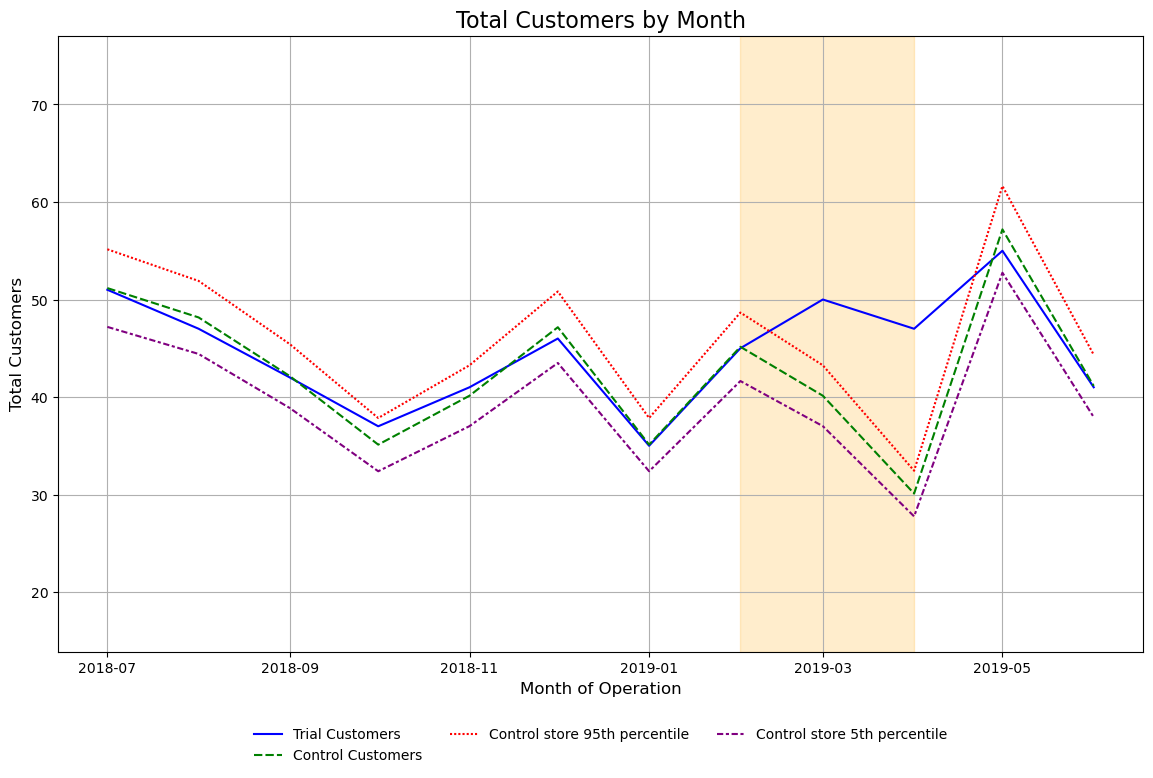

In [714]:
import matplotlib.dates as mdates

# Set up the plot
plt.figure(figsize=(14, 8))

# Define a custom color palette for customers
custom_palette_cust = {
    'Trial Customers': 'blue',
    'Control Customers': 'green',
    'Control store 95th percentile': 'red',
    'Control store 5th percentile': 'purple'
}

# Plot the data using the customer dataset
ax2 = sns.lineplot(data=trial_Assessment_cust, palette=custom_palette_cust)

# Get the range of y-values from the data
y_min = trial_Assessment_cust.min().min() * 0.5  # Slight padding
y_max = trial_Assessment_cust.max().max() * 1.25  # Slight padding

# Set the dynamic y-axis limits
plt.ylim((y_min, y_max))

# Customize the legend
sns.move_legend(ax2, "lower center", bbox_to_anchor=(0.5, -0.2), ncol=3, frameon=False)

# Set titles and labels
plt.title('Total Customers by Month', fontsize=16)
plt.xlabel('Month of Operation', fontsize=12)
plt.ylabel('Total Customers', fontsize=12)

# Highlight specific time range
plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']), color='orange', alpha=0.2)

# Add grid for clarity
plt.grid()

# Show the plot
plt.show()
